In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    './archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    './archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


Image tensor:
 [[[156.5  140.5  150.5 ]
  [141.   125.   135.  ]
  [152.75 136.75 146.75]
  ...
  [133.75 111.75 114.75]
  [140.75 118.75 121.75]
  [131.5  109.5  112.5 ]]

 [[148.75 132.75 142.75]
  [145.25 129.25 139.25]
  [147.5  131.5  141.5 ]
  ...
  [133.25 111.25 114.25]
  [119.25  97.25 100.25]
  [124.5  102.5  105.5 ]]

 [[136.   120.   130.  ]
  [150.75 134.75 144.75]
  [109.5   93.5  103.5 ]
  ...
  [128.   106.   109.  ]
  [144.   122.   125.  ]
  [115.25  93.25  96.25]]

 ...

 [[178.75 166.75 176.75]
  [186.5  174.5  184.5 ]
  [170.5  158.5  168.5 ]
  ...
  [145.75 124.75 133.75]
  [139.25 118.25 127.25]
  [133.25 112.25 121.25]]

 [[195.5  183.5  193.5 ]
  [176.25 164.25 174.25]
  [172.5  160.5  170.5 ]
  ...
  [148.75 127.75 136.75]
  [148.25 127.25 136.25]
  [147.75 126.75 135.75]]

 [[166.75 154.75 164.75]
  [202.25 190.25 200.25]
  [169.75 157.75 167.75]
  ...
  [128.75 107.75 116.75]
  [147.   126.   135.  ]
  [131.5  110.5  119.5 ]]]
Label tensor:
 [0. 0. 0. 0. 0. 

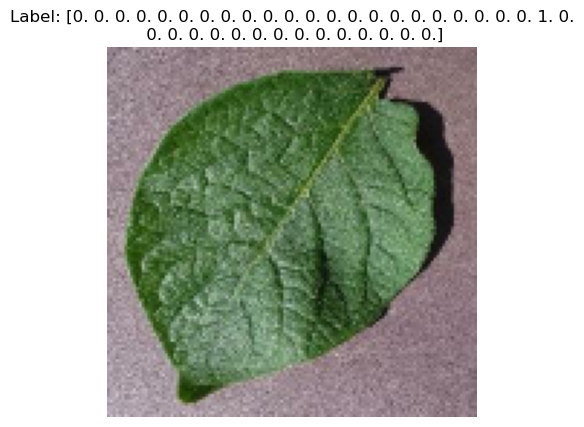

In [4]:
# selecting the first image from first batch to display it's tensor and it's label's tensor.
# but since *shuffle=True* ,the image used will be different each time.
for image_batch, label_batch in training_set.take(1):
    img_tensor = image_batch[0]
    label = label_batch[0]

    print("Image tensor:\n", img_tensor.numpy())
    print("Label tensor:\n", label.numpy())

    # converting numpy array to unsigned 8 bit integer
    plt.imshow(img_tensor.numpy().astype("uint8"))
    plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()

In [5]:
img_tensor.numpy().dtype

dtype('float32')

In [6]:
from collections import Counter

class_count = Counter()

# Iterate over the dataset and count occurrences of each label
for image_batch, label_batch in training_set:
    # Convert the one-hot encoded labels to integer indices
    class_indices = tf.argmax(label_batch, axis=1).numpy()

    # Update the counter with the class indices from this batch
    class_count.update(class_indices)

# Map the class indices to class names
class_names = training_set.class_names
class_distribution = {class_names[i]: count for i, count in class_count.items()}

# Print the number of images per class
print("Number of images per class:")
for class_name, count in class_distribution.items():
    print(f"{class_name}: {count}")

Number of images per class:
Potato___Early_blight: 1939
Corn_(maize)___Northern_Leaf_Blight: 1908
Tomato___Spider_mites Two-spotted_spider_mite: 1741
Grape___healthy: 1692
Grape___Esca_(Black_Measles): 1920
Corn_(maize)___Common_rust_: 1907
Apple___healthy: 2008
Squash___Powdery_mildew: 1736
Apple___Black_rot: 1987
Pepper,_bell___Bacterial_spot: 1913
Tomato___Late_blight: 1851
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 1961
Peach___healthy: 1728
Tomato___Bacterial_spot: 1702
Potato___Late_blight: 1939
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1722
Apple___Cedar_apple_rust: 1760
Tomato___Tomato_mosaic_virus: 1790
Strawberry___healthy: 1824
Orange___Haunglongbing_(Citrus_greening): 2010
Tomato___healthy: 1926
Blueberry___healthy: 1816
Corn_(maize)___healthy: 1859
Grape___Black_rot: 1888
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 1642
Strawberry___Leaf_scorch: 1774
Tomato___Early_blight: 1920
Peach___Bacterial_spot: 1838
Apple___Apple_scab: 2016
Pepper,_bell___healthy: 1988
Raspbe

### Here, we can see that the no. of images in each class is almost similar, hence the biasness of the model will be less
as the model won't be trained particularly more for a particular class than the other classes.

In [7]:
cnn = tf.keras.models.Sequential()
## Building Convolution Layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

F:\SK\AnaconProj\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())

## Adding GRU layer

In [14]:
cnn.add(tf.keras.layers.Reshape((128, 16)))
cnn.add(tf.keras.layers.GRU(units=128, return_sequences=False))

In [15]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

## Compiling and Training Phase

In [16]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 128, 16)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 128)                 │          56,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │         193,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,018,826 (19.15 MB)

 Trainable params: 5,018,826 (19.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

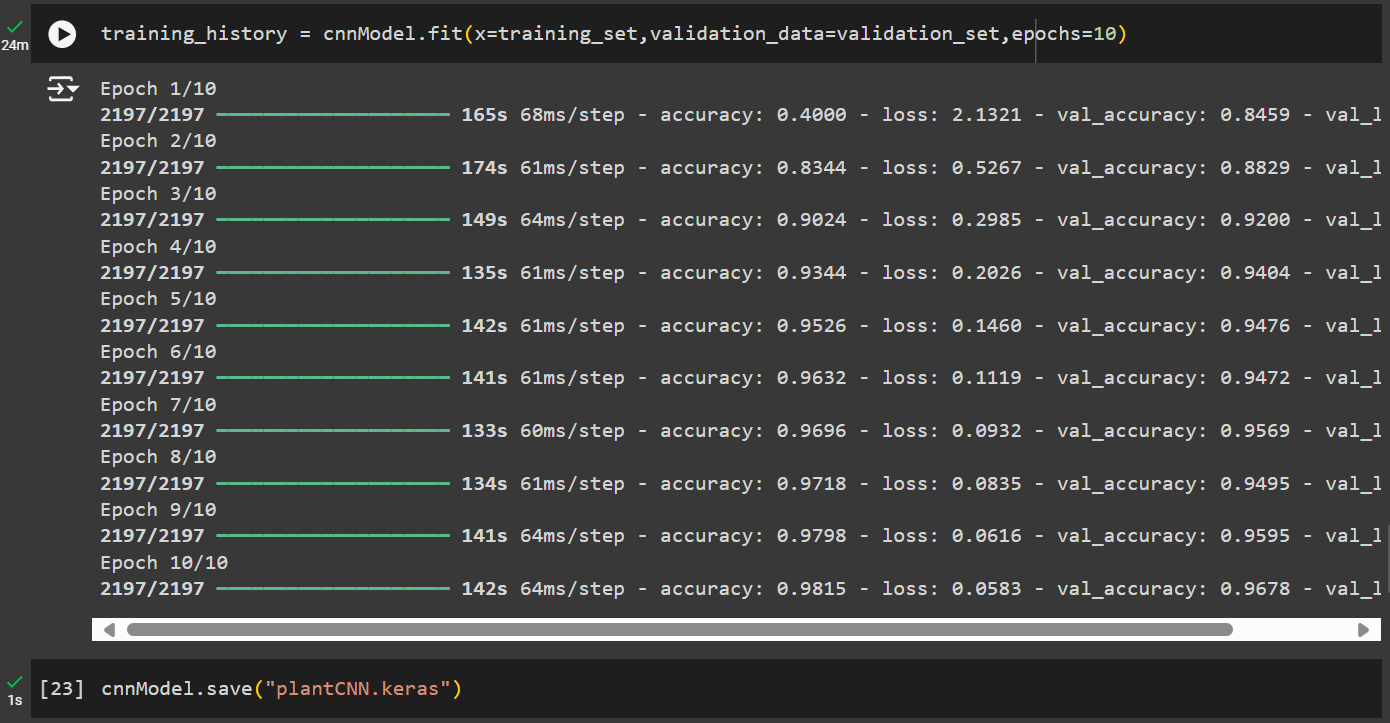

## Above model training is performed in google colab and the model is exported as .keras file which we'll import here and use.

In [18]:
plantCNN = tf.keras.models.load_model('./plantCNN.keras')

In [19]:
training_history=pd.read_json('./training_hist.json')
training_history

,accuracy,loss,val_accuracy,val_loss
0,0.597838,1.370157,0.845948,0.499438
1,0.857344,0.451171,0.882882,0.369254
2,0.910790,0.272854,0.919986,0.244237
3,0.939370,0.185206,0.940360,0.179402
4,0.954406,0.140310,0.947587,0.158364
5,0.963966,0.109351,0.947246,0.165692
6,0.971435,0.087804,0.956863,0.150100
7,0.973881,0.078054,0.949522,0.172133
8,0.978860,0.064965,0.959538,0.127980
9,0.981905,0.056330,0.967847,0.112298


## This is the training history for 10 epochs that this model was trained for, using backpropagation to reduce loss and increase accuracy
**also.. learning_rate=0.0001 in model compilation to prevent overshooting of loss function**

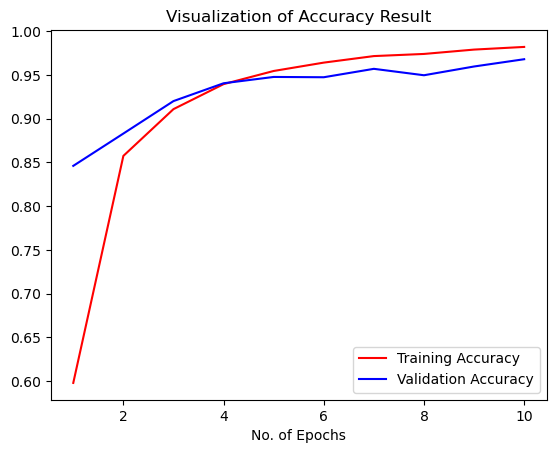

In [20]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Evaluating the Model on training and validation set(using google colab)

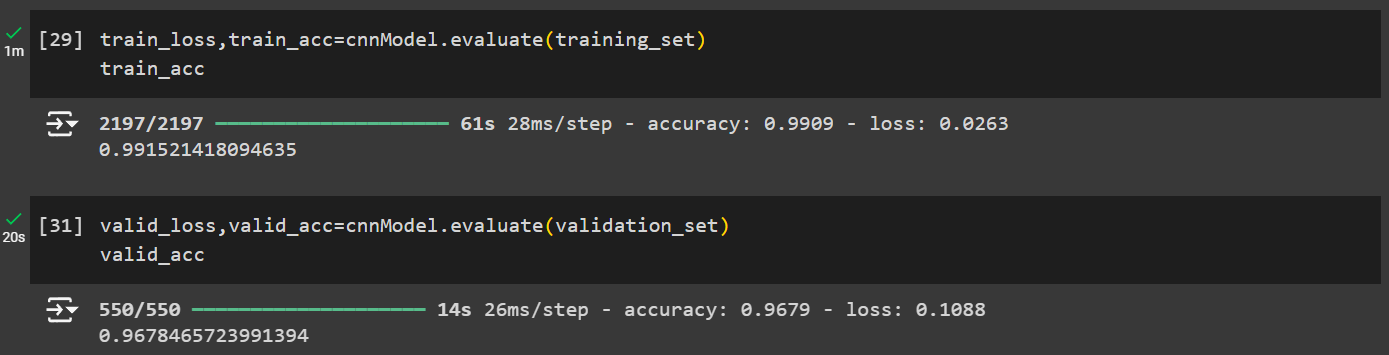